In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd
import japanize_matplotlib 
plt.rcParams['font.family'] = 'IPAexGothic'

In [30]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [47]:
marketcap = pd.read_csv('efficient_frontier(ver1.1).csv', index_col=0)
del marketcap['TOPIX']
del marketcap['キヤノン']

In [48]:
R = (marketcap.diff()/marketcap.shift(1))[1:] * 100

In [49]:
T,N = R.shape
Mu = R.mean().values
Sigma_ = R.cov()
Sigma = Sigma_.values
Return_Dev = (R - Mu).values

In [50]:
Weight = cp.Variable(N)
Deviation = cp.Variable(T)
Target_Return = cp.Parameter()
Risk_Variance = cp.sum_squares(Deviation) / T
Opt_Portfolio = cp.Problem(cp.Minimize(Risk_Variance), [Return_Dev @ Weight == Deviation, Weight.T @ Mu == Target_Return, cp.sum(Weight) == 1.0, Weight >= 0.0])

In [51]:
V_Target = np.linspace(Mu.min(), Mu.max(), num=100)
V_Risk = np.zeros(V_Target.shape)
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cp.OSQP)
    V_Risk[idx] = np.sqrt(Risk_Variance.value)
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(V_Risk, V_Target, 'b-')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['Frontier', 'Asset'], loc='best', frameon=False)
plt.xlabel('Standard deviation (%)')
plt.ylabel('Expected return (%)')
plt.show()

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

In [44]:
marketcap

エーザイ         ファンケル          キヤノン          デンソー      三菱総合研究所  \
銘柄名称                                                                          
9-Dec   1.010000e+12  1.100000e+11  5.220000e+12  2.460000e+12  33094521200   
10-Jan  9.980000e+11  1.180000e+11  4.710000e+12  2.360000e+12  30548788800   
10-Feb  1.030000e+12  1.170000e+11  4.930000e+12  2.130000e+12  29366255040   
10-Mar  9.890000e+11  1.150000e+11  5.780000e+12  2.460000e+12  30187459040   
10-Apr  9.560000e+11  1.090000e+11  5.810000e+12  2.440000e+12  30827998160   
...              ...           ...           ...           ...          ...   
21-Mar  2.200000e+12  4.870000e+11  3.340000e+12  5.790000e+12  67667209600   
21-Apr  2.110000e+12  4.650000e+11  3.470000e+12  5.560000e+12  67667209600   
21-May  2.180000e+12  4.500000e+11  3.410000e+12  5.910000e+12  64053912000   
21-Jun  3.240000e+12  4.690000e+11  3.350000e+12  5.970000e+12  64792995600   
21-Jul  2.660000e+12  4.520000e+11  3.330000e+12  5.900000e+12  65449958800   

                日本郵船         大日本印刷           京セラ          ＫＤＤＩ          ローソン  \
銘柄名称                                                                           
9-Dec   4.850000e+11  8.270000e+11  1.560000e+12  2.210000e+12  4.080000e+11   
10-Jan  5.320000e+11  8.680000e+11  1.570000e+12  2.140000e+12  4.080000e+11   
10-Feb  5.480000e+11  8.230000e+11  1.510000e+12  2.130000e+12  3.870000e+11   
10-Mar  6.280000e+11  8.850000e+11  1.740000e+12  2.170000e+12  3.970000e+11   
10-Apr  6.600000e+11  9.140000e+11  1.820000e+12  2.040000e+12  4.140000e+11   
...              ...           ...           ...           ...           ...   
21-Mar  6.420000e+11  7.520000e+11  2.650000e+12  7.820000e+12  5.450000e+11   
21-Apr  7.300000e+11  7.040000e+11  2.510000e+12  7.620000e+12  4.910000e+11   
21-May  7.680000e+11  7.480000e+11  2.540000e+12  8.560000e+12  4.940000e+11   
21-Jun  9.570000e+11  7.450000e+11  2.590000e+12  7.980000e+12  5.160000e+11   
21-Jul  1.000000e+12  8.140000e+11  2.540000e+12  7.680000e+12  5.510000e+11   

                 東洋紡       コニカミノルタ          ヤマト          三菱商事      アウトソーシング  \
銘柄名称                                                                          
9-Dec   1.100000e+11  5.060000e+11   8589920988  3.910000e+12  6.309159e+09   
10-Jan  1.030000e+11  4.910000e+11   8374499772  3.710000e+12  5.555478e+09   
10-Feb  1.010000e+11  4.890000e+11   8132150904  3.770000e+12  5.485549e+09   
10-Mar  1.120000e+11  5.800000e+11   8724559248  4.160000e+12  5.345691e+09   
10-Apr  1.190000e+11  6.320000e+11   8805342204  3.810000e+12  7.197011e+09   
...              ...           ...          ...           ...           ...   
21-Mar  1.270000e+11  3.020000e+11  18122309796  4.650000e+12  2.250000e+11   
21-Apr  1.180000e+11  3.110000e+11  17799177972  4.490000e+12  2.120000e+11   
21-May  1.200000e+11  3.010000e+11  21030496212  4.430000e+12  2.540000e+11   
21-Jun  1.190000e+11  3.090000e+11  21542121600  4.500000e+12  2.540000e+11   
21-Jul  1.230000e+11  2.810000e+11  21111279168  4.550000e+12  2.620000e+11   

                三菱電機  
銘柄名称                  
9-Dec   1.470000e+12  
10-Jan  1.520000e+12  
10-Feb  1.570000e+12  
10-Mar  1.840000e+12  
10-Apr  1.810000e+12  
...              ...  
21-Mar  3.620000e+12  
21-Apr  3.610000e+12  
21-May  3.630000e+12  
21-Jun  3.460000e+12  
21-Jul  3.170000e+12  

[140 rows x 16 columns]

In [45]:
R

エーザイ      ファンケル       キヤノン       デンソー   三菱総合研究所       日本郵船  \
銘柄名称                                                                      
10-Jan  -1.188119   7.272727  -9.770115  -4.065041 -7.692308   9.690722   
10-Feb   3.206413  -0.847458   4.670913  -9.745763 -3.870968   3.007519   
10-Mar  -3.980583  -1.709402  17.241379  15.492958  2.796421  14.598540   
10-Apr  -3.336704  -5.217391   0.519031  -0.813008  2.121872   5.095541   
10-May  -5.857741 -25.256193 -14.113597 -11.065574 -9.376665 -15.757576   
...           ...        ...        ...        ...       ...        ...   
21-Mar   1.382488  -1.616162   9.150327  15.109344  2.615193  23.461538   
21-Apr  -4.090909  -4.517454   3.892216  -3.972366  0.000000  13.707165   
21-May   3.317536  -3.225806  -1.729107   6.294964 -5.339806   5.205479   
21-Jun  48.623853   4.222222  -1.759531   1.015228  1.153846  24.609375   
21-Jul -17.901235  -3.624733  -0.597015  -1.172529  1.013942   4.493208   

            大日本印刷        京セラ       ＫＤＤＩ      ローソン        東洋紡    コニカミノルタ  \
銘柄名称                                                                      
10-Jan   4.957678   0.641026  -3.167421  0.000000  -6.363636  -2.964427   
10-Feb  -5.184332  -3.821656  -0.467290 -5.147059  -1.941748  -0.407332   
10-Mar   7.533414  15.231788   1.877934  2.583979  10.891089  18.609407   
10-Apr   3.276836   4.597701  -5.990783  4.282116   6.250000   8.965517   
10-May -14.551422 -16.483516  -9.313725 -6.763285 -10.084034 -13.924051   
...           ...        ...        ...       ...        ...        ...   
21-Mar  21.095008   2.316602   3.166227  9.218437   5.833333  11.439114   
21-Apr  -6.382979  -5.283019  -2.557545 -9.908257  -7.086614   2.980132   
21-May   6.250000   1.195219  12.335958  0.610998   1.694915  -3.215434   
21-Jun  -0.401070   1.968504  -6.775701  4.453441  -0.833333   2.657807   
21-Jul   9.261745  -1.930502  -3.759398  6.782946   3.361345  -9.061489   

              ヤマト       三菱商事   アウトソーシング       三菱電機  
銘柄名称                                                
10-Jan  -2.507837  -5.115090 -11.945813   3.401361  
10-Feb  -2.893891   1.617251  -1.258741   3.289474  
10-Mar   7.284768  10.344828  -2.549575  17.197452  
10-Apr   0.925926  -8.413462  34.631999  -1.630435  
10-May -12.844037  -8.661417 -20.302376 -11.602210  
...           ...        ...        ...        ...  
21-Mar   3.379416   4.260090   9.756098   7.418398  
21-Apr  -1.783061  -3.440860  -5.777778  -0.276243  
21-May  18.154312  -1.336303  19.811321   0.554017  
21-Jun   2.432778   1.580135   0.000000  -4.683196  
21-Jul  -2.000000   1.111111   3.149606  -8.381503  

[139 rows x 16 columns]

In [46]:
R.mean().values

array([ 1.12211945,  1.36238358, -0.11531783,  0.95553382,  0.74054185,
        0.98397656,  0.21292047,  0.57004055,  1.09426761,  0.33218641,
        0.3572939 ,  0.09050579,  0.93308907,  0.33730023,  4.01050203,
        0.83760656])

In [11]:
R.std().values

array([ 9.56378417,  8.40357882,  6.43495377,  8.09418096,  7.10535766,
        9.71478839,  6.70741643,  6.61009272,  6.29204098,  4.81177931,
        7.47377779, 10.15391783,  7.51234854,  6.80714387, 16.70394283,
        7.53667583])

In [12]:
R.corr().values

array([[1.        , 0.18697755, 0.15734874, 0.20222333, 0.21719527,
        0.27488905, 0.17741467, 0.21465943, 0.23869155, 0.33763432,
        0.12561671, 0.14469168, 0.20362214, 0.18124337, 0.11756632,
        0.20861461],
       [0.18697755, 1.        , 0.1486302 , 0.2604797 , 0.23529668,
        0.25672156, 0.27726026, 0.06406626, 0.15423137, 0.08352406,
        0.10182689, 0.20102891, 0.2433844 , 0.16059766, 0.26622484,
        0.13923795],
       [0.15734874, 0.1486302 , 1.        , 0.55094788, 0.28426444,
        0.55902643, 0.4404881 , 0.59114724, 0.22021511, 0.23051236,
        0.36445061, 0.6297496 , 0.27207428, 0.52734974, 0.28917925,
        0.560958  ],
       [0.20222333, 0.2604797 , 0.55094788, 1.        , 0.3222269 ,
        0.69066767, 0.56189703, 0.52142789, 0.35709413, 0.25597773,
        0.53052381, 0.59808607, 0.37189296, 0.55551692, 0.29676242,
        0.58736866],
       [0.21719527, 0.23529668, 0.28426444, 0.3222269 , 1.        ,
        0.35278018, 0.33891398, 

In [13]:
Sigma

array([[ 91.46596769,  15.02738805,   9.68363597,  15.65430995,
         14.75931052,  25.53997988,  11.38084644,  13.5702326 ,
         14.36343635,  15.53753243,   8.97878058,  14.05099146,
         14.62953402,  11.79931564,  18.78156074,  15.03676196],
       [ 15.02738805,  70.62013697,   8.0374219 ,  17.71785178,
         14.0496668 ,  20.95848915,  15.6281355 ,   3.55878068,
          8.15508597,   3.37739273,   6.39538837,  17.15364582,
         15.36500656,   9.186888  ,  37.37075271,   8.81864257],
       [  9.68363597,   8.0374219 ,  41.40863007,  28.69649524,
         12.99732274,  34.94709818,  19.01230973,  25.14482693,
          8.91628808,   7.13748719,  17.52767407,  41.14783395,
         13.15251006,  23.09984673,  31.08361766,  27.20543097],
       [ 15.65430995,  17.71785178,  28.69649524,  65.51576539,
         18.53192966,  54.30944746,  30.50597564,  27.89810583,
         18.18641797,   9.96967004,  32.09356592,  49.15528741,
         22.6134381 ,  30.60801234,  

In [14]:
Sigma_

エーザイ      ファンケル       キヤノン       デンソー    三菱総合研究所       日本郵船  \
エーザイ      91.465968  15.027388   9.683636  15.654310  14.759311  25.539980   
ファンケル     15.027388  70.620137   8.037422  17.717852  14.049667  20.958489   
キヤノン       9.683636   8.037422  41.408630  28.696495  12.997323  34.947098   
デンソー      15.654310  17.717852  28.696495  65.515765  18.531930  54.309447   
三菱総合研究所   14.759311  14.049667  12.997323  18.531930  50.486107  24.351374   
日本郵船      25.539980  20.958489  34.947098  54.309447  24.351374  94.377114   
大日本印刷     11.380846  15.628136  19.012310  30.505976  16.152164  35.991377   
京セラ       13.570233   3.558781  25.144827  27.898106  13.700919  30.361095   
ＫＤＤＩ      14.363436   8.155086   8.916288  18.186418   6.341553  15.505629   
ローソン      15.537532   3.377393   7.137487   9.969670  10.134838   7.945827   
東洋紡        8.978781   6.395388  17.527674  32.093566  10.076333  33.304296   
コニカミノルタ   14.050991  17.153646  41.147834  49.155287  21.324551  57.416945   
ヤマト       14.629534  15.365007  13.152510  22.613438   9.289833  18.675025   
三菱商事      11.799316   9.186888  23.099847  30.608012  16.612785  38.515665   
アウトソーシング  18.781561  37.370753  31.083618  40.123685  29.096931  61.027177   
三菱電機      15.036762   8.818643  27.205431  35.831378  13.511695  41.542173   

              大日本印刷        京セラ       ＫＤＤＩ       ローソン        東洋紡     コニカミノルタ  \
エーザイ      11.380846  13.570233  14.363436  15.537532   8.978781   14.050991   
ファンケル     15.628136   3.558781   8.155086   3.377393   6.395388   17.153646   
キヤノン      19.012310  25.144827   8.916288   7.137487  17.527674   41.147834   
デンソー      30.505976  27.898106  18.186418   9.969670  32.093566   49.155287   
三菱総合研究所   16.152164  13.700919   6.341553  10.134838  10.076333   21.324551   
日本郵船      35.991377  30.361095  15.505629   7.945827  33.304296   57.416945   
大日本印刷     44.989435  20.962640  12.474672  10.714098  26.654891   25.154136   
京セラ       20.962640  43.693326  13.254912   4.168166  20.829553   39.594515   
ＫＤＤＩ      12.474672  13.254912  39.589780   6.705214   7.613136   14.346039   
ローソン      10.714098   4.168166   6.705214  23.153220   6.135036    8.653382   
東洋紡       26.654891  20.829553   7.613136   6.135036  55.857354   26.007337   
コニカミノルタ   25.154136  39.594515  14.346039   8.653382  26.007337  103.102047   
ヤマト       18.513002   9.941351  11.283900   8.448746  12.811206    8.021677   
三菱商事      22.295208  21.979974   8.247157   4.856628  22.456489   41.048372   
アウトソーシング  31.427760  26.339562  17.863067  18.605493  32.784653   51.147244   
三菱電機      24.226324  31.235209  14.513026   5.853402  23.817508   42.083007   

                ヤマト       三菱商事    アウトソーシング       三菱電機  
エーザイ      14.629534  11.799316   18.781561  15.036762  
ファンケル     15.365007   9.186888   37.370753   8.818643  
キヤノン      13.152510  23.099847   31.083618  27.205431  
デンソー      22.613438  30.608012   40.123685  35.831378  
三菱総合研究所    9.289833  16.612785   29.096931  13.511695  
日本郵船      18.675025  38.515665   61.027177  41.542173  
大日本印刷     18.513002  22.295208   31.427760  24.226324  
京セラ        9.941351  21.979974   26.339562  31.235209  
ＫＤＤＩ      11.283900   8.247157   17.863067  14.513026  
ローソン       8.448746   4.856628   18.605493   5.853402  
東洋紡       12.811206  22.456489   32.784653  23.817508  
コニカミノルタ    8.021677  41.048372   51.147244  42.083007  
ヤマト       56.435381   6.760532   26.261070  15.822301  
三菱商事       6.760532  46.337208   33.538821  27.653888  
アウトソーシング  26.261070  33.538821  279.021706  31.473301  
三菱電機      15.822301  27.653888   31.473301  56.801483

In [15]:
marketcap.columns

Index(['エーザイ', 'ファンケル', 'キヤノン', 'デンソー', '三菱総合研究所', '日本郵船', '大日本印刷', '京セラ',
       'ＫＤＤＩ', 'ローソン', '東洋紡', 'コニカミノルタ', 'ヤマト', '三菱商事', 'アウトソーシング', '三菱電機'],
      dtype='object')

<AxesSubplot:xlabel='銘柄名称'>

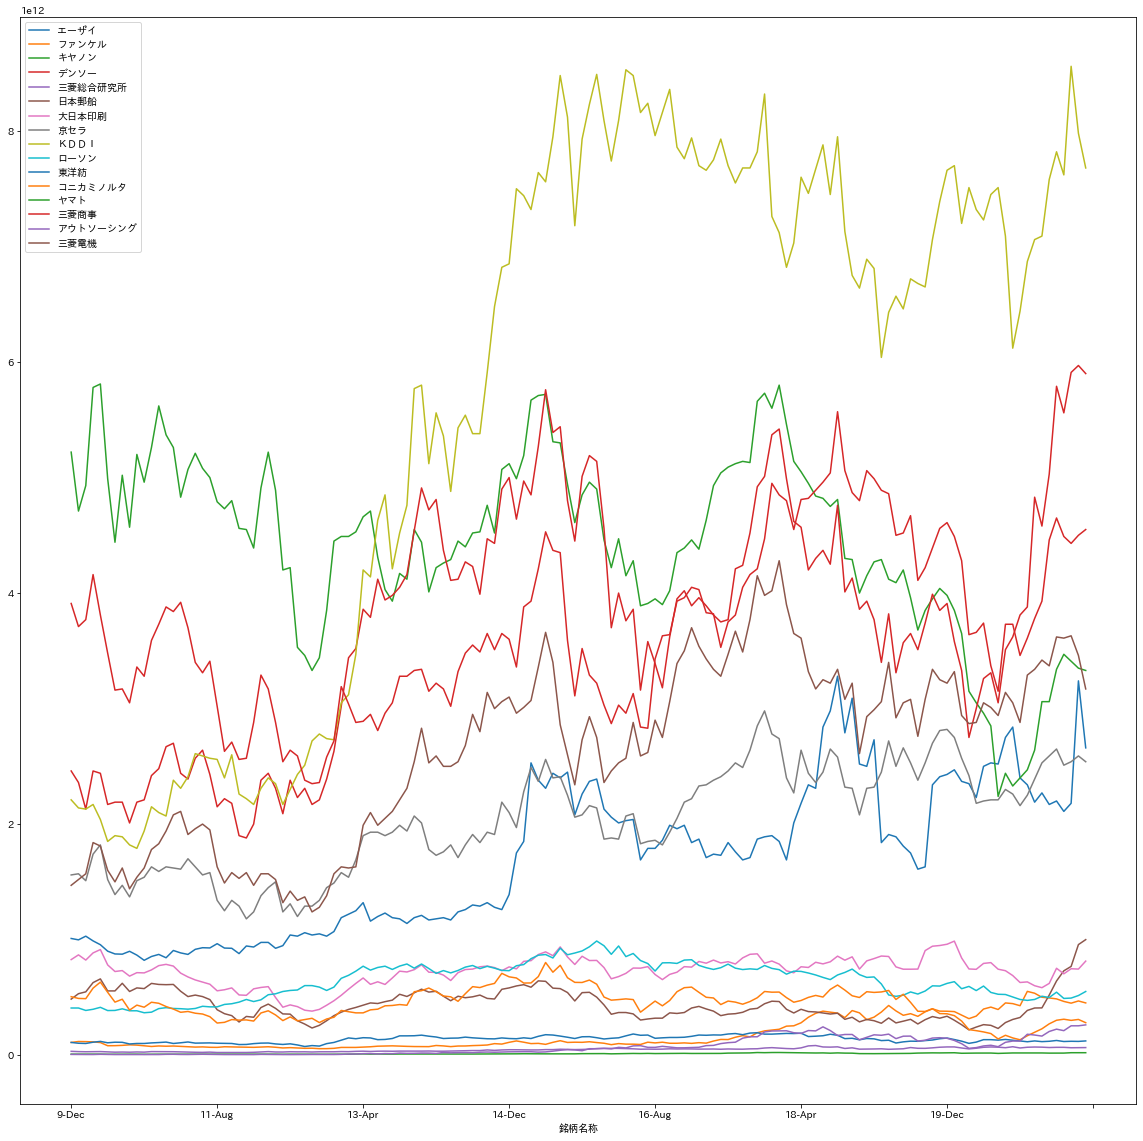

In [16]:
marketcap.plot(figsize=(20, 20))

<AxesSubplot:xlabel='銘柄名称', ylabel='相対株価'>

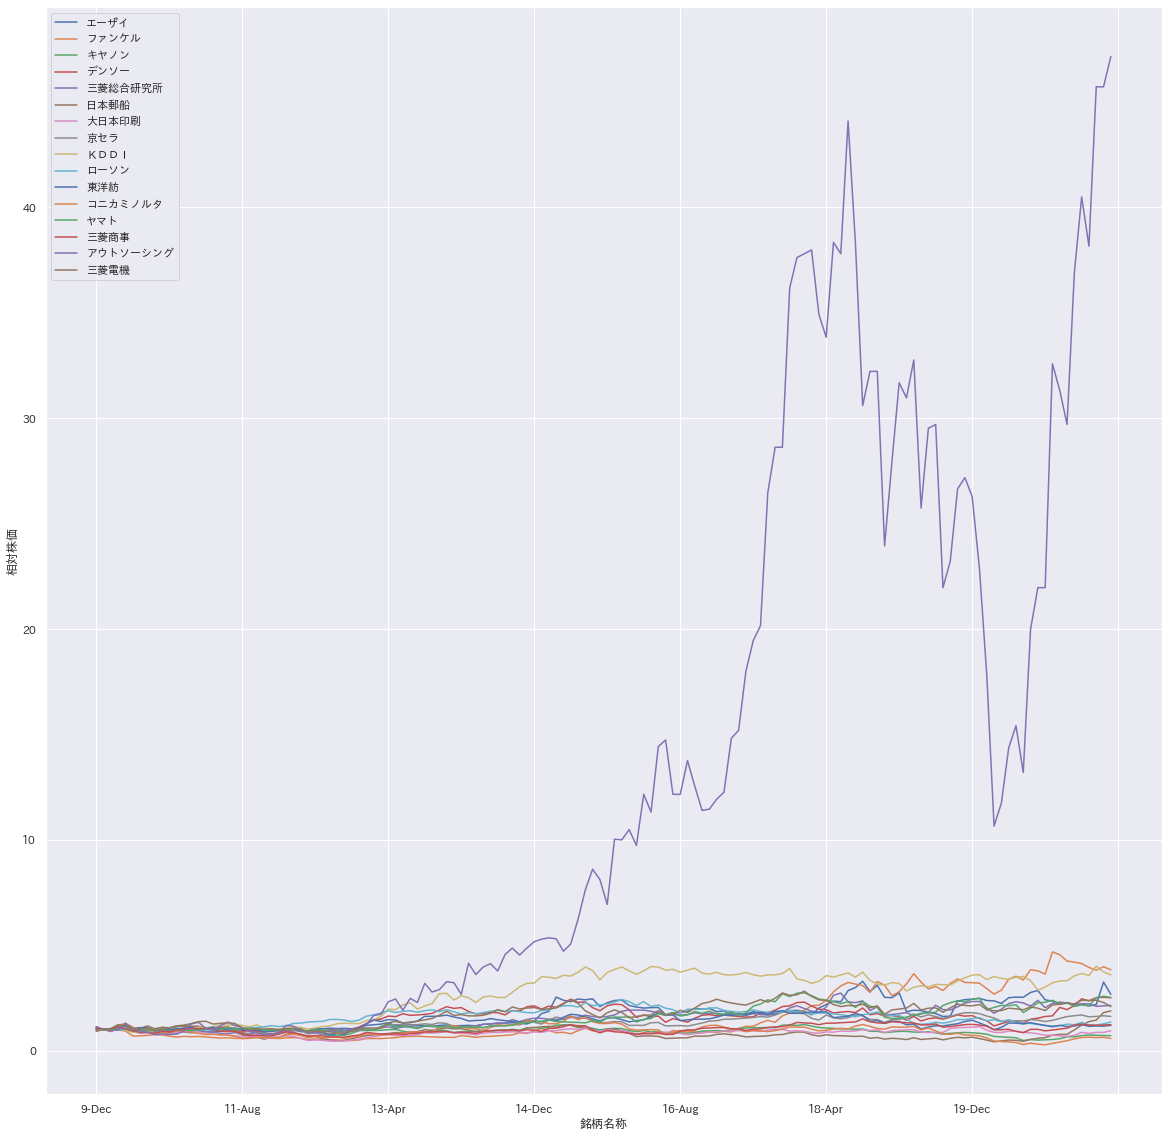

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
sns.set(font='IPAexGothic')
all_df = marketcap
# 可視化用コード
# 価格推移
plot_df = all_df/all_df.loc['10-Jan',:]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel('相対株価')
plot_df.plot(figsize=(20,20),ax=ax)

<AxesSubplot:>

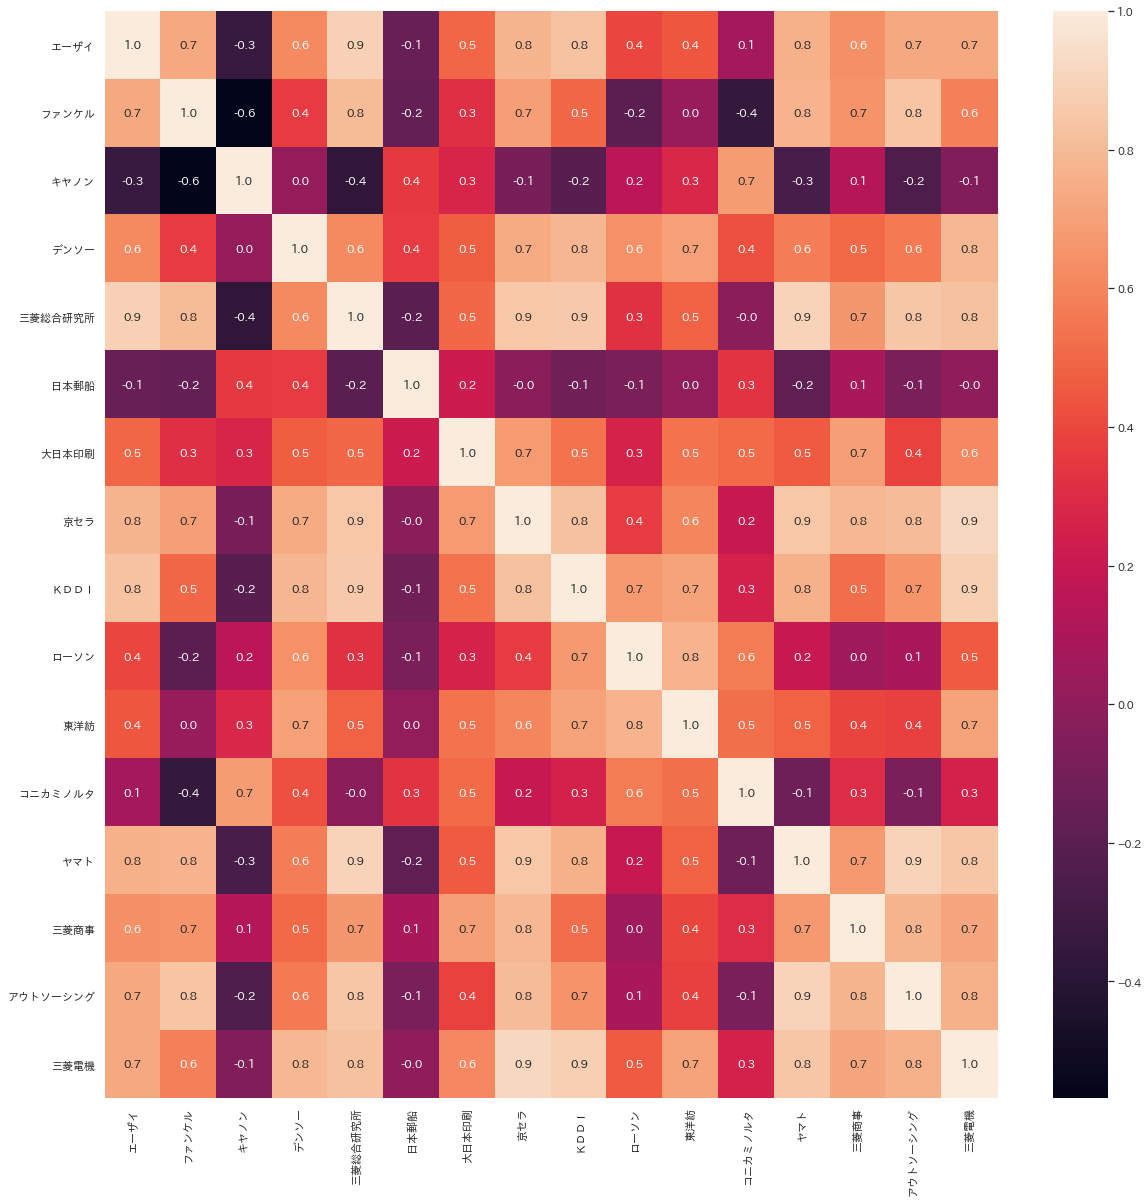

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(all_df.corr(),annot=True, fmt="1.1f")

Expected annual return: 6.7%
Annual volatility: 13.6%
Sharpe Ratio: 0.35


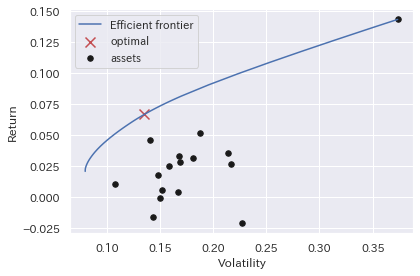

In [52]:
from pypfopt.efficient_frontier import EfficientFrontier#, objective_functions
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import CLA, plotting

days=5 #リターン、リスクの計算期間
mu = expected_returns.mean_historical_return(all_df,frequency=days) # リターンの計算
S = risk_models.sample_cov(all_df,frequency=days) # リスク：標本共分散の計算
cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True)
ax = plotting.plot_efficient_frontier(cla, showfig=False)